### Crop Recomendation Model

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from joblib import dump, load

In [278]:
crop_df = pd.read_csv('../Datasets/Crop_recommendation.csv')
crop_df.head(3).to_excel('../Datasets/Insigths/crop.xlsx')
crop_df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [279]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [280]:
#Describe
crop_df.describe().to_excel('../Datasets/Insigths/Crop-Describe.xlsx')
crop_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [281]:
# Extracting Classes
crop_class = list(crop_df['label'].unique())
crop_class.sort()
crop_class

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [282]:
index_label = [crop_class.index(x) for x in crop_class]
index_label

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [283]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
crop_df['num_label'] = label_encoder.fit_transform(crop_df['label'])
crop_df

,N,P,K,temperature,humidity,ph,rainfall,label,num_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


### Data Cleaning
- Missing Values
- Outleirs

In [284]:
crop_df.isna().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
num_label      False
dtype: bool

- There is no missing values

#### Boxplot for outliers insights

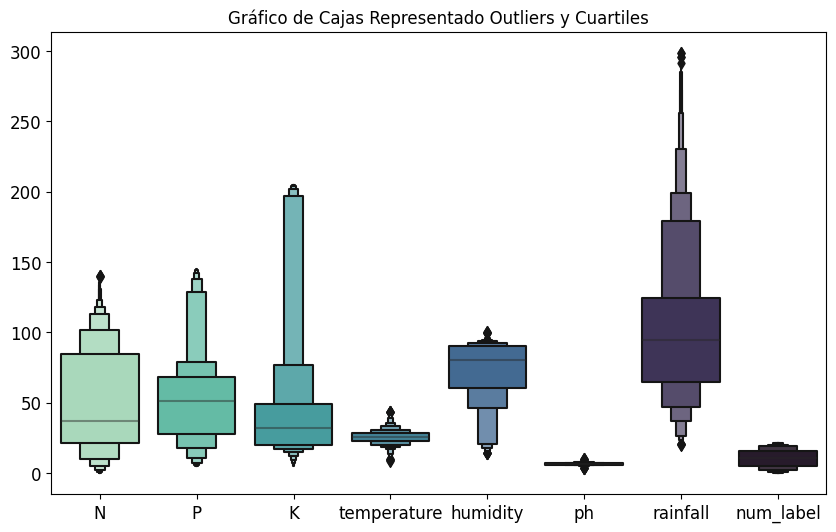

In [285]:
feature_list = list(crop_df.columns)
plt.figure(figsize=(10,6))
sns.boxenplot(data=crop_df, palette='mako_r')
plt.title('Gráfico de Cajas Representado Outliers y Cuartiles')
plt.tick_params(labelsize=12)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'N'),
  Text(1.5, 0, 'P'),
  Text(2.5, 0, 'K'),
  Text(3.5, 0, 'temperature'),
  Text(4.5, 0, 'humidity'),
  Text(5.5, 0, 'ph'),
  Text(6.5, 0, 'rainfall'),
  Text(7.5, 0, 'num_label')])

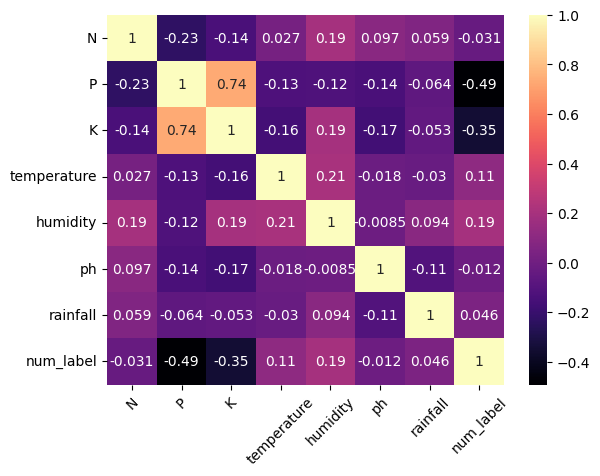

In [286]:
sns.heatmap(crop_df.corr(),cmap='magma', annot=True)
plt.xticks(rotation=45)

In [287]:
crop_df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'num_label'],
      dtype='object')

In [288]:
#X Values
feature = ['temperature','rainfall', 'humidity', 'ph','N','P','K']
X = crop_df[feature]
X.head()

,temperature,rainfall,humidity,ph,N,P,K
0,20.879744,202.935536,82.002744,6.502985,90,42,43
1,21.770462,226.655537,80.319644,7.038096,85,58,41
2,23.004459,263.964248,82.320763,7.840207,60,55,44
3,26.491096,242.864034,80.158363,6.980401,74,35,40
4,20.130175,262.717340,81.604873,7.628473,78,42,42


In [289]:
#Y Values
target = ['num_label']
Y = crop_df[target]
Y.head()

,num_label
0,20
1,20
2,20
3,20
4,20


#### Split Train & Validation Set 

In [290]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [291]:
# X Train
print(len(x_train))
print(len(x_test))

1760
440


### Classification Models


#### Decision Tree Classifier

In [292]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, f1_score, roc_auc_score

In [293]:
# Model 
DT_model = DecisionTreeClassifier(max_leaf_nodes=50, random_state=0)
type(DT_model)

sklearn.tree._classes.DecisionTreeClassifier

In [294]:
# Fit the Model
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=50, random_state=0)

In [295]:
# Evaluation
y_test_pred  = DT_model.predict(x_test)

In [296]:
# Metrics
DT_Accuracy = accuracy_score(y_test,y_test_pred)
DT_Recall = recall_score(y_test, y_test_pred, average='weighted')
DT_F1Score = f1_score(y_test, y_test_pred, average='weighted')
print(DT_Accuracy, DT_Recall, DT_F1Score)

0.9840909090909091 0.9840909090909091 0.9842426010491807


In [297]:
# Save Model
dump(DT_model,'../Models/Crop/Crop_DT.joblib')

['../Models/Crop/Crop_DT.joblib']

#### Gaussian Naivy Bayes

In [298]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

In [299]:
GNB_model = GNB.fit(x_train, y_train) 

d:\Software Development\PythonLearning\Curso-Python\Virtual Enviroment\deeplearning\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [300]:
y_test_pred = GNB_model.predict(x_test)

In [301]:
# Metrics
# Metrics
GNB_Accuracy = accuracy_score(y_test,y_test_pred)
GNB_Recall = recall_score(y_test, y_test_pred, average='weighted')
GNB_F1Score = f1_score(y_test, y_test_pred, average='weighted')
print(GNB_Accuracy, GNB_Recall, GNB_F1Score)

0.9954545454545455 0.9954545454545455 0.9954545454545455


In [302]:
# Save Model
dump(GNB_model,'../Models/Crop/Crop_GNB.joblib')

['../Models/Crop/Crop_GNB.joblib']

#### RandomForest

In [303]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()

In [304]:
RF_model.fit(x_train, y_train)

C:\Users\Wise George\AppData\Local\Temp\ipykernel_7536\1308253992.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(x_train, y_train)


RandomForestClassifier()

In [305]:
y_test_pred = RF_model.predict(x_test)

In [306]:
# Metrics
RF_Accuracy = accuracy_score(y_test,y_test_pred)
RF_Recall = recall_score(y_test, y_test_pred, average='weighted')
RF_F1Score = f1_score(y_test, y_test_pred, average='weighted')
print(RF_Accuracy, RF_Recall, RF_F1Score)

0.9954545454545455 0.9954545454545455 0.9954572559223722


In [307]:
# Save Model
dump(RF_model,'../Models/Crop/Crop_RF.joblib')

['../Models/Crop/Crop_RF.joblib']

#### Support Vector Machine

In [308]:
from sklearn.svm import SVC
SVM_model = SVC(probability=True)

In [309]:
SVM_model.fit(x_train, y_train)

d:\Software Development\PythonLearning\Curso-Python\Virtual Enviroment\deeplearning\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [310]:
y_test_pred = SVM_model.predict(x_test)

In [311]:
# Metrics
SVM_Accuracy = accuracy_score(y_test,y_test_pred)
SVM_Recall = recall_score(y_test, y_test_pred, average='weighted')
SVM_F1Score = f1_score(y_test, y_test_pred, average='weighted')
print(SVM_Accuracy, SVM_Recall, SVM_F1Score)

0.9772727272727273 0.9772727272727273 0.9768856717415183


In [312]:
# Save Model
dump(SVM_model,'../Models/Crop/Crop_SVM.joblib')

['../Models/Crop/Crop_SVM.joblib']

#### Weigth Distribution Function

In [313]:
def Relative_Model_Accuracy(accuracy_list, beta=0.7):
    final_Weigth_Distribution = [round(x * beta /sum(accuracy_list),3) for x in accuracy_list]
    return final_Weigth_Distribution

In [314]:
Relative_Model_Accuracy([DT_Accuracy, RF_Accuracy, GNB_Accuracy, SVM_Accuracy])

[0.174, 0.176, 0.176, 0.173]

### Weighted Classifier

In [315]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

##>The base classifiers are those built previously: 
##->Decision Tree, Random Forest, Gaussian Naive Bayes and Support Vector Machine
from sklearn.ensemble import VotingClassifier
# Weigth Distribution Function
acc_list = [DT_Accuracy, RF_Accuracy, GNB_Accuracy, SVM_Accuracy]
final_w = Relative_Model_Accuracy(acc_list)

# Weighted Classifier
WC_model = VotingClassifier(estimators=[('dt', DT_model), 
                                        ('rf', RF_model), 
                                        ('gnb', GNB_model), 
                                        ('svc', SVM_model)], 
                                        voting='soft', 
                                        weights=[final_w[0], final_w[1], final_w[2], final_w[3]])

# Train
WC_model.fit(x_train, y_train)

# Predict
y_test_pred = WC_model.predict(x_test)

d:\Software Development\PythonLearning\Curso-Python\Virtual Enviroment\deeplearning\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Software Development\PythonLearning\Curso-Python\Virtual Enviroment\deeplearning\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [316]:
# Metrics
WC_Accuracy = accuracy_score(y_test,y_test_pred)
WC_Recall = recall_score(y_test, y_test_pred, average='weighted')
WC_F1Score = f1_score(y_test, y_test_pred, average='weighted')
print(WC_Accuracy, WC_Recall, WC_F1Score)

0.9977272727272727 0.9977272727272727 0.9977286940701575


In [317]:
# Save Model
dump(WC_model,'../Models/Crop/Crop_Advanced_WC.joblib')

['../Models/Crop/Crop_Advanced_WC.joblib']

<AxesSubplot:>

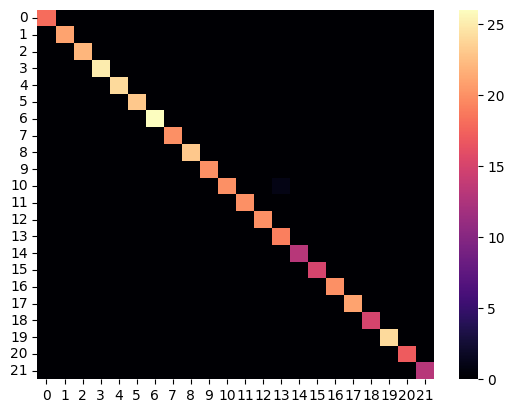

In [318]:
sns.heatmap(confusion_matrix(y_test,y_test_pred), cmap='magma')

In [319]:
#### Summary
models = ['DecisionTree', 'GaussianNB', 'RandomForest','SupportVectorMachine','WeightedClassifier']
accuracy = [round(DT_Accuracy, 3), round(GNB_Accuracy, 5), round(RF_Accuracy, 3), round(SVM_Accuracy, 3), round(WC_Accuracy, 5)]
recall = [round(DT_Recall, 3), round(GNB_Recall, 5), round(RF_Recall, 3), round(SVM_Recall, 3), round(WC_Recall, 5)]
f1 = [round(DT_F1Score, 3), round(GNB_F1Score, 5), round(RF_F1Score, 3), round(SVM_F1Score, 3), round(WC_F1Score, 5)]

Models_Metrics = {
            'Models': models,
            'Accuracy': accuracy,
            'Recall': recall,
            'F1_Score': f1
}

Models_Metrics = pd.DataFrame(Models_Metrics)
Models_Metrics


,Models,Accuracy,Recall,F1_Score
0,DecisionTree,0.98400,0.98400,0.98400
1,GaussianNB,0.99545,0.99545,0.99545
2,RandomForest,0.99500,0.99500,0.99500
3,SupportVectorMachine,0.97700,0.97700,0.97700
4,WeightedClassifier,0.99773,0.99773,0.99773


In [320]:
# Save Model Metrics
Models_Metrics.to_excel('../Models/Metrics/Crop_Models_Metrics.xlsx')

#### Models Metrics Analysis

In [321]:
models_df = pd.read_excel('../Models/Metrics/Crop_Models_Metrics.xlsx')
models_df

,Unnamed: 0,Models,Accuracy,Recall,F1_Score
0,0,DecisionTree,0.98400,0.98400,0.98400
1,1,GaussianNB,0.99545,0.99545,0.99545
2,2,RandomForest,0.99500,0.99500,0.99500
3,3,SupportVectorMachine,0.97700,0.97700,0.97700
4,4,WeightedClassifier,0.99773,0.99773,0.99773
